In [1]:
# @author: Sarunas Jonauskas
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
from matplotlib import gridspec

In [2]:
# Objective functions
def Sphere(x_j, D):
    Sum = 0
    for i in range(D):
        Sum += x_j[i]**2 
    return Sum    

def Rosenbrock(x_j, D):
    Sum = 0
    for i in range(D - 1):
        Sum += 10*(x_j[i+1] - x_j[i])**2 + (x_j[i] - 1)**2 
    return Sum

def Ackley(x_j, D):
    Sum_1 = 0
    Sum_2 = 0
    for i in range(D):
        Sum_1 += x_j[i]**2
        Sum_2 += np.cos(2 * np.pi * x_j[i])    
    return -20 * np.exp(-0.2 * np.sqrt(1/D * Sum_1)) - np.exp(1/D * Sum_2) + np.e + 20

In [3]:
# Mutation operations
def mutation(x, F):
    #print(len(x))
    #print(min(x[0] + F * (x[1] - x[2])))
    return x[0] + F * (x[1] - x[2])

def mutation_jitter(x, F):
    # Tryed to make but didn't manage -> Choosing the Base Vector Index, r0, Random Without Restrictions
    #np.floor(np.random.rand()*len(x[0])) ???
    return x[0] + (0.0001 * np.random.rand() + F) * (x[1] - x[2])

In [4]:
# Boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [np.clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound

# Crossover operation
def crossover(mutated, target, D, cr):
    p = np.random.rand(D)
    # Trial vector
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(D)]
    return trial

In [5]:
def DifferentialEvolution(function, population_size, bounds, iterations, D, F, cr, strategy = 'classical'):
    if strategy == 'classical':
        print("Chosen strategy: 'classical'")
        #Mutation = mutation
    elif strategy == 'jitter':
        print("Chosen strategy: 'jitter'")
        #Mutation = mutation_jitter
    else:
        print("Incorrect choice of strategy!\n\nAvailabe strategies: 'classical', 'jitter'.")
     
    # We initialise the population with candidate solutions in the bound range. Then we evaluate it.
    population_init = bounds[:, 0] + (np.random.rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    population = [function(ind, D) for ind in population_init]
    
    # Using np.min() we find the best value if the vector
    best_vector = population_init[np.argmin(population)]
    best_population = np.min(population)
    prev_population = best_population
    best_output = [] 
    #print(prev_population)
    
    # The main algorithm. Iteration through over all candidate solutions
    for i in range(iterations):
        for j in range(population_size):
            # Three candidates: a, b and c.
            candidates = [candidate for candidate in range(population_size) if candidate != j]
            a, b, c = population_init[np.random.choice(candidates, 3, replace=False)]
            # Mutation
            if strategy == 'classical':
                mutated = mutation([a, b, c], F)
            elif strategy == 'jitter':
                mutated = mutation_jitter([a, b, c], F)
            # Checking lower and upper bounds
            mutated = check_bounds(mutated, bounds)
            # perform crossover
            trial = crossover(mutated, population_init[j], len(bounds), cr)
            # Function value for target vector
            function_target = function(population_init[j], D)
            # Function value for trial vector
            function_trial = function(trial, D)

            if function_trial < function_target:
                # Replacing target vector with trial vector and then storing the new function value
                population_init[j] = trial
                population[j] = function_trial
        # Best vector
        best_population = min(population)
        best_output.append(best_population)
        # Storing values
        if best_population < prev_population:
            best_vector = population_init[np.argmin(population)]
            prev_population = best_population
        if i % 50 == 0:
            print('\nIteration: %d f(%s) = %.5f' % (i, np.around(best_vector, decimals=5), best_population))
    return [best_vector, best_population, np.array(best_output)]

In [6]:
# dimensions
D = 20
pop_size = 50
iterations = 1000
# Scale factor for mutation
F = 0.5
# Crossover rate for recombination
cr = 0.7

# Bounds
bounds = []
bound_min, bound_max = -100, 100
for i in range(D):
    bounds.append((bound_min, bound_max))
bounds = np.array(bounds)

Output = []

In [7]:
solution_classical = DifferentialEvolution(Rosenbrock, pop_size, bounds, iterations, D, F, cr, strategy='classical')
print('\nSolution: f(%s) = %.5f' % (np.around(solution_classical[0], decimals=5), solution_classical[1]))

solution_jitter = DifferentialEvolution(Rosenbrock, pop_size, bounds, iterations, D, F, cr, strategy='jitter')
print('\nSolution: f(%s) = %.5f' % (np.around(solution_jitter[0], decimals=5), solution_jitter[1]))

Chosen strategy: 'classical'

Iteration: 0 f([ -9.33027 -50.56414  91.21673  97.28516   4.40101  21.27864  41.21737
 -39.68504  32.03471  38.61469  23.60309 -14.24626 -72.90519 -40.34353
  13.99298  41.28109  14.86505  10.32098  30.42065 -13.71631]) = 595176.05688

Iteration: 50 f([-1.329790e+01 -4.831240e+00 -7.817290e+00  1.449715e+01 -4.290488e+01
  3.158360e+00 -1.648177e+01  1.432499e+01 -2.840328e+01 -1.472647e+01
  2.997626e+01  8.226260e+00  1.049050e+00  3.205000e-02 -2.807348e+01
 -2.340780e+00  2.436878e+01  3.494487e+01  5.523110e+00 -2.944997e+01]) = 169823.19611

Iteration: 100 f([ 22.51676   6.47629  15.29568  -5.28865 -19.29763 -21.90965 -17.74396
 -27.80815 -18.30723   1.67665 -19.68999   0.07329  -2.81837  -0.34425
  -7.84847  -6.83548   0.44456 -10.95635  15.11969  28.71326]) = 39523.82035

Iteration: 150 f([-13.2979  -11.36373 -10.82711 -13.84417  -3.69603   8.32092  15.52634
  18.22007   5.82971  -6.2262  -10.02699   4.34011   0.36172   4.84591
   4.74208  -0.79056

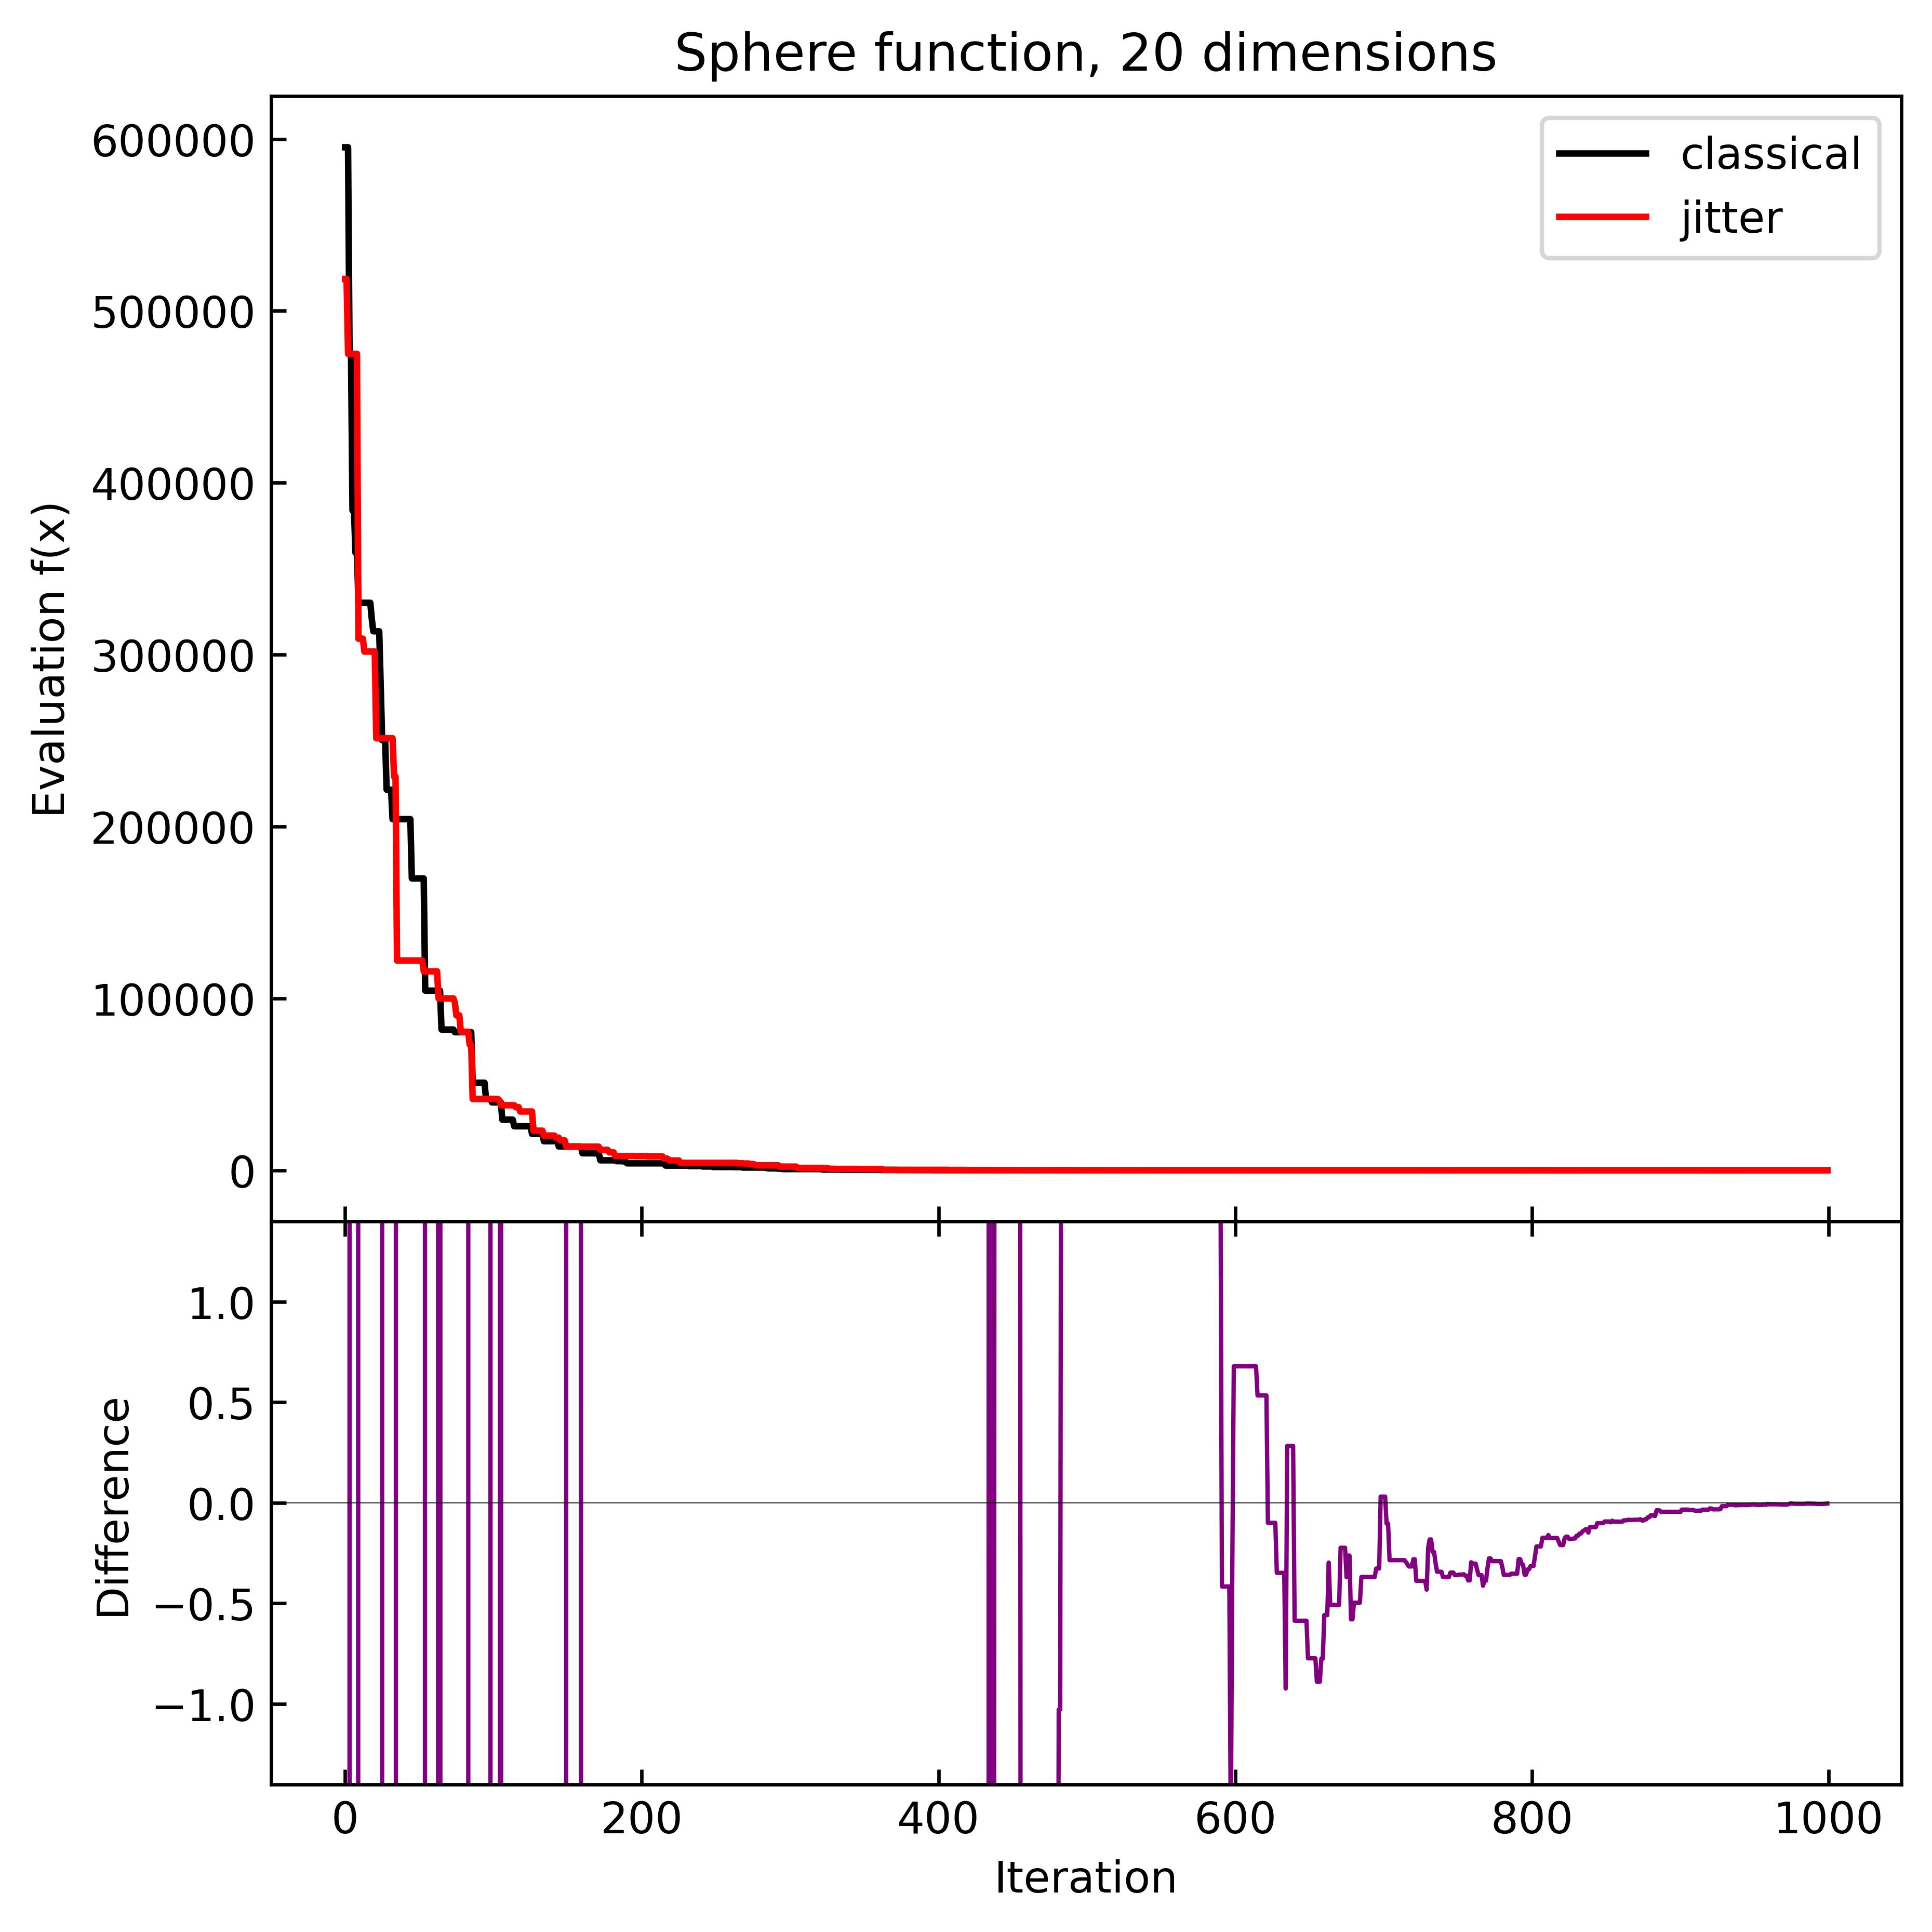

In [8]:
plt.figure(dpi=600, figsize=(6, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(solution_classical[2], label='classical', c='black', lw=1.5)
ax0.plot(solution_jitter[2], label='jitter', c='red', lw=1.5)
ax0.set_ylabel('Evaluation f(x)')
ax0.axes.xaxis.set_ticklabels([])
ax0.tick_params(axis="x", direction="in")
ax0.tick_params(axis="y", direction="in")
ax0.set_title('Sphere function, 20 dimensions')
ax0.legend()

ax1 = plt.subplot(gs[1])
ax1.plot(solution_classical[2]-solution_jitter[2], c='purple', lw=1)
ax1.axhline(0, lw=0.2, c='black')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Difference')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis="x", direction="in")
ax1.tick_params(axis="y", direction="in")
ax1.set_ylim(-1.4, 1.4)

plt.tight_layout(pad=0)
